<h1>Якубов Артём ИУ5-63Б</h1>
<br>
<h2>6 Вариант, задача №3</h2>
<br>
Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('FIFA 2018 Statistics.csv', sep=",")

In [3]:
data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [4]:
data.dtypes

Date                       object
Team                       object
Opponent                   object
Goal Scored                 int64
Ball Possession %           int64
Attempts                    int64
On-Target                   int64
Off-Target                  int64
Blocked                     int64
Corners                     int64
Offsides                    int64
Free Kicks                  int64
Saves                       int64
Pass Accuracy %             int64
Passes                      int64
Distance Covered (Kms)      int64
Fouls Committed             int64
Yellow Card                 int64
Yellow & Red                int64
Red                         int64
Man of the Match           object
1st Goal                  float64
Round                      object
PSO                        object
Goals in PSO                int64
Own goals                 float64
Own goal Time             float64
dtype: object

In [5]:
data.isnull().sum()

Date                        0
Team                        0
Opponent                    0
Goal Scored                 0
Ball Possession %           0
Attempts                    0
On-Target                   0
Off-Target                  0
Blocked                     0
Corners                     0
Offsides                    0
Free Kicks                  0
Saves                       0
Pass Accuracy %             0
Passes                      0
Distance Covered (Kms)      0
Fouls Committed             0
Yellow Card                 0
Yellow & Red                0
Red                         0
Man of the Match            0
1st Goal                   34
Round                       0
PSO                         0
Goals in PSO                0
Own goals                 116
Own goal Time             116
dtype: int64

In [6]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 128


<h2>Масштабирование данных</h2>

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [8]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Goal Scored']])

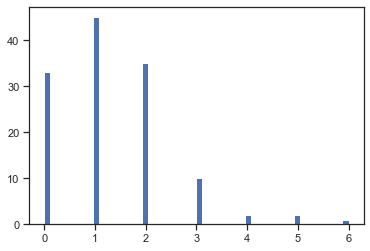

In [9]:
plt.hist(data['Goal Scored'], 50)
plt.show()

<h2>Преобразование категориальных признаков в количественные двумя способами</h2>

<h3>Label encoding</h3>

**Метод не расширяет признаковое пространство набора данных**

In [10]:
temp_data = data[['Team']]
temp_data.head()

,Team
0,Russia
1,Saudi Arabia
2,Egypt
3,Uruguay
4,Morocco


In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [12]:
temp_data['Team'].unique()

array(['Russia', 'Saudi Arabia', 'Egypt', 'Uruguay', 'Morocco', 'Iran',
       'Portugal', 'Spain', 'France', 'Australia', 'Argentina', 'Iceland',
       'Peru', 'Denmark', 'Croatia', 'Nigeria', 'Costa Rica', 'Serbia',
       'Germany', 'Mexico', 'Brazil', 'Switzerland', 'Sweden',
       'Korea Republic', 'Belgium', 'Panama', 'Tunisia', 'England',
       'Colombia', 'Japan', 'Poland', 'Senegal'], dtype=object)

In [13]:
temp_data[temp_data['Team'].isnull()].shape

(0, 1)

In [14]:
np.unique(temp_data)

array(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Colombia',
       'Costa Rica', 'Croatia', 'Denmark', 'Egypt', 'England', 'France',
       'Germany', 'Iceland', 'Iran', 'Japan', 'Korea Republic', 'Mexico',
       'Morocco', 'Nigeria', 'Panama', 'Peru', 'Poland', 'Portugal',
       'Russia', 'Saudi Arabia', 'Senegal', 'Serbia', 'Spain', 'Sweden',
       'Switzerland', 'Tunisia', 'Uruguay'], dtype=object)

In [15]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(temp_data['Team'])

In [16]:
le.inverse_transform([0, 1, 2])

array(['Argentina', 'Australia', 'Belgium'], dtype=object)

<h3>One-hot encoding</h3>

**Использование данного метода не задает отношение порядка между значениями признака**

In [17]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(temp_data)

In [18]:
temp_data.shape

(128, 1)

In [19]:
cat_enc_ohe.shape

(128, 32)

In [20]:
cat_enc_ohe

<128x32 sparse matrix of type '<class 'numpy.float64'>'
	with 128 stored elements in Compressed Sparse Row format>

In [21]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 

In [22]:
temp_data.head(10)

,Team
0,Russia
1,Saudi Arabia
2,Egypt
3,Uruguay
4,Morocco
5,Iran
6,Portugal
7,Spain
8,France
9,Australia


<h3>Ящик с усами</h3>

**Отображает одномерное распределение вероятности**

<AxesSubplot:xlabel='Attempts'>

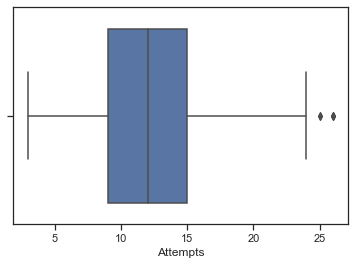

In [23]:
sns.boxplot(x=data['Attempts'])

<AxesSubplot:ylabel='Saves'>

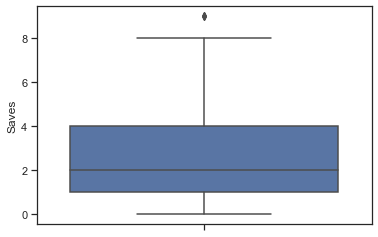

In [24]:
sns.boxplot(y=data['Saves'])